In [ ]:
#| default_exp app

# Snake Image Classification

In [ ]:
import fastai
fastai.__version__

'2.7.11'

In [ ]:
#| export
from fastai.vision.all import *
from huggingface_hub import from_pretrained_fastai
import gradio as gr

In [ ]:
#| export
repo_id = "Jimmie/snake-image-classification"

# loading the model from huggingface_hub
learner = from_pretrained_fastai(repo_id)

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#| export
path = Path('demo-images/')

In [ ]:
list(path.ls())

[Path('demo-images/masticophis.jpg'),
 Path('demo-images/micrurus.jpg'),
 Path('demo-images/agkistrodon.png'),
 Path('demo-images/Pantherophis.jpg'),
 Path('demo-images/lampropeltis.jpg'),
 Path('demo-images/thamnophis.jpg'),
 Path('demo-images/natrix.jpg'),
 Path('demo-images/nerodia.jpg'),
 Path('demo-images/tantilla.jpg'),
 Path('demo-images/crotalus.jpg')]

In [ ]:
snakes = get_image_files(path)

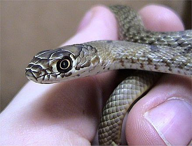

In [ ]:
im = PILImage.create(snakes[0])
im.thumbnail((192,192))
im

In [ ]:
snakes[0]

Path('demo-images/masticophis.jpg')

In [ ]:
pred,idx,probs = learner.predict(im)
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")

Prediction of the genus: Masticophis
Probability: 88.28%


In [ ]:
snakes[2]

Path('demo-images/agkistrodon.png')

In [ ]:
pred,idx,probs = learner.predict(snakes[2])
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")

Prediction of the genus: Agkistrodon
Probability: 91.21%


In [ ]:
snakes[7]

Path('demo-images/nerodia.jpg')

In [ ]:
pred,idx,probs = learner.predict(snakes[7])
print(f"Prediction of the genus: {pred}")
print(f"Probability: {100*probs[idx].item():.2f}%")

Prediction of the genus: Nerodia
Probability: 64.35%


In [ ]:
#| export
categories = tuple(learner.dls.vocab)

def classify_image(img):
    pred,idx,probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))

In [ ]:
classify_image(snakes[7])

{'Agkistrodon': 0.00013586886052507907,
 'Crotalus': 0.010002714581787586,
 'Lampropeltis': 0.00047056630137376487,
 'Masticophis': 0.0002429549494991079,
 'Micrurus': 0.00012576498556882143,
 'Natrix': 0.3323909044265747,
 'Nerodia': 0.6434937715530396,
 'Pantherophis': 0.0035959137603640556,
 'Tantilla': 0.00017943432612810284,
 'Thamnophis': 0.009362072683870792}

In [ ]:
#| export
title = "Snake Image Classification"

description = """
This demo is an ongoing iteration of a [bigger project](https://github.com/jimmiemunyi/the-snake-project) meant to classify snakes as venomous or non-venomous.

Currently, it can classify snakes into 10 genera.

The model can be found here: https://huggingface.co/Jimmie/snake-image-classification
 

Enjoy!
"""

article = "Blog posts on how the model is being trained: ."


image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label()
examples = list(path.ls())


intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples,
                   title = title, description = description, article = article,
                   enable_queue=True, cache_examples=False)
intf.launch(inline=False)

/home/eleven/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/eleven/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/eleven/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/eleven/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/home/eleven/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `enable_qu

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# export

In [ ]:
from nbdev.export import nb_export

In [ ]:
nb_export('app.ipynb', lib_path='.')